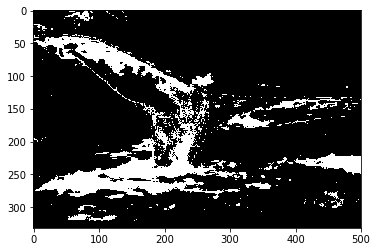

5


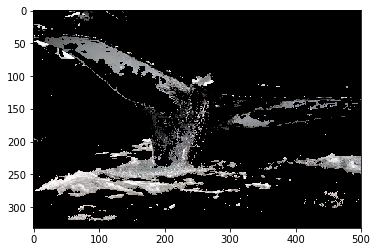

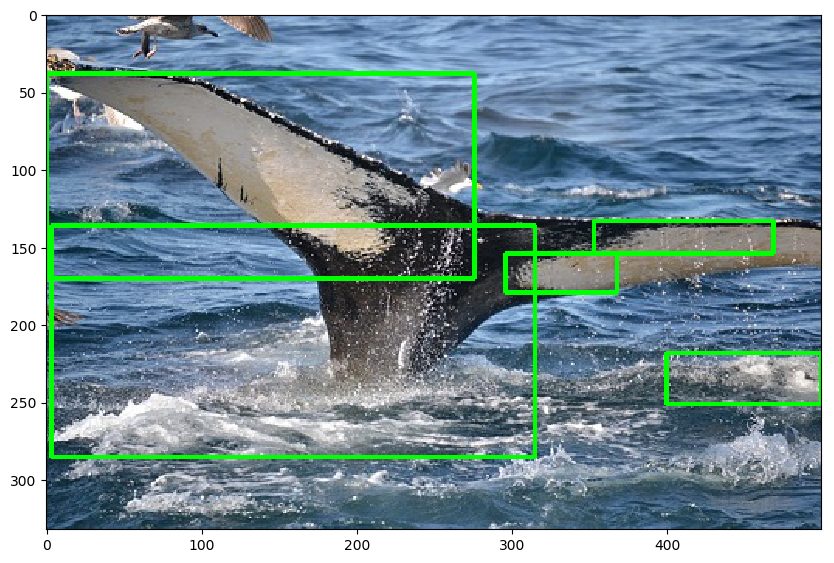

10136.0
白 


In [227]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob

path='whale/images/G0010003.jpg'

#img = cv2.imread('/Users/expether/shinkawa/whale/cut_img/2012-K-1-All/120113K/120113K 063.png', -1) 
img = cv2.imread(path)

def isWhite(img):
    H_MAX = 180
    H_MIN = 0
    S_MAX = 20
    S_MIN = 0
    V_MAX = 255
    V_MIN = 0
    min_area=300
    
    # HSVに変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 白のHSV範囲
    lower_white = np.array([H_MIN,S_MIN,V_MIN], np.uint8)
    upper_white = np.array([H_MAX,S_MAX,V_MAX], np.uint8)

    # 白以外にマスク
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    res_white = cv2.bitwise_and(img,img, mask= mask_white)    

    plt.imshow(cv2.cvtColor(mask_white, cv2.COLOR_GRAY2RGB)), plt.show()
    
    gray_img=cv2.cvtColor(res_white, cv2.COLOR_BGR2GRAY)

    image, contours, hierarchy = cv2.findContours(gray_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # 輪郭抽出
    contours.sort(key=cv2.contourArea, reverse=True) # 一番大きい輪郭を抽出
    
    if(len(contours) != 0):
        
        large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
        print(len(large_contours))
        
        for cnt in large_contours:
            
            x,y,w,h = cv2.boundingRect(cnt)
            img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        plt.imshow(res_white),plt.show()
        plt.figure(figsize=(10,10),dpi=100)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.show()
        cv2.imwrite('resultresultresult.jpg', img)
    
    if(len(contours) == 0):
        return False

    # find contours of large enough area
    elif cv2.contourArea(contours[0]) > min_area:
        area = cv2.contourArea(contours[0])
        print(area)
        return True

    else:
        area = cv2.contourArea(contours[0])
        print(area) 
        return False


result = isWhite(img)

if(result):
    print('白 ')

else:
    print('黒 ')
